In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Excel dosyasının yolunu belirtin
dosya_yolu = "C:/Users/muzaffer/Downloads/netflix_titles.xlsx"

# Excel dosyasını bir veri çerçevesine yükleyin
data = pd.read_excel(dosya_yolu)

# Veri çerçevesini kontrol edin
print(data.head())  # Veri çerçevesinin ilk birkaç satırını yazdırır


  duration_minutes duration_seasons     type  \
0               90              NaN    Movie   
1               94              NaN    Movie   
2              NaN                1  TV Show   
3              NaN                1  TV Show   
4               99              NaN    Movie   

                                     title           date_added  release_year  \
0  Norm of the North: King Sized Adventure  2019-09-09 00:00:00        2019.0   
1               Jandino: Whatever it Takes  2016-09-09 00:00:00        2016.0   
2                       Transformers Prime  2018-09-08 00:00:00        2013.0   
3         Transformers: Robots in Disguise  2018-09-08 00:00:00        2016.0   
4                             #realityhigh  2017-09-08 00:00:00        2017.0   

     rating                                        description     show_id  
0     TV-PG  Before planning an awesome wedding for his gra...  81145628.0  
1     TV-MA  Jandino Asporaat riffs on the challenges of ra...  801174

In [ ]:
#2016-2019 yılları için her tip showları görüyoruz
data = data.loc[data['release_year'].isin([*range(2016, 2020)]), ['type', 'release_year']].copy()
data.dropna(inplace=True)
data['release_year'] = data['release_year'].astype('int')
data

In [10]:
cross_tab_prop = pd.crosstab(index=data['release_year'],
                             columns=data['type'],
                             normalize="index")
cross_tab_prop

type,Movie,TV Show
release_year,,
2016,0.714458,0.285542
2017,0.711157,0.288843
2018,0.607714,0.392286
2019,0.474496,0.525504


In [11]:

cross_tab = pd.crosstab(index=data['release_year'],
                        columns=data['type'])
cross_tab

type,Movie,TV Show
release_year,,
2016,593,237
2017,682,277
2018,646,417
2019,400,443


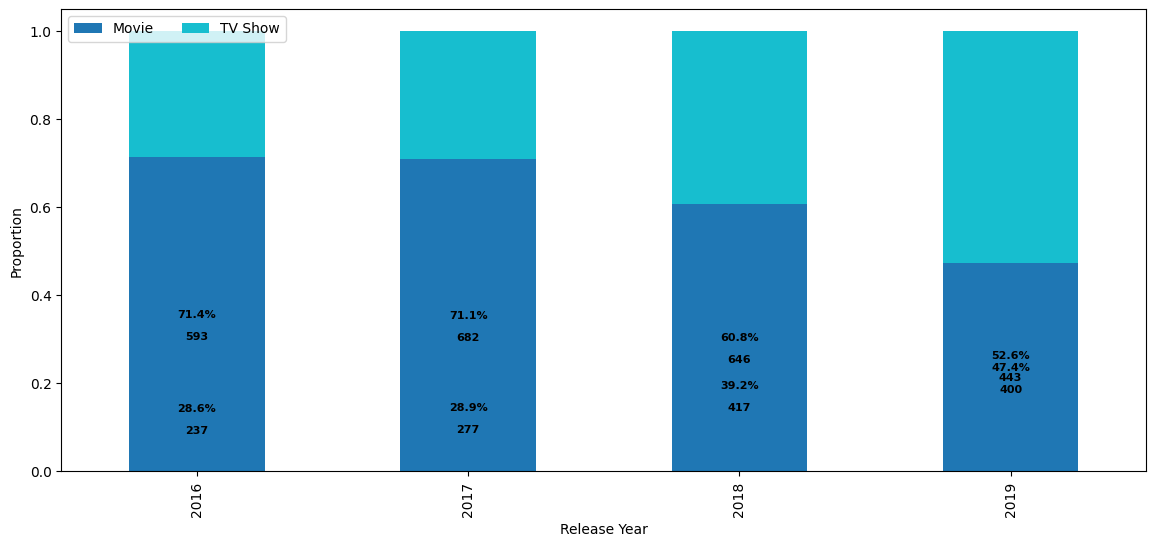

In [21]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(14, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")


# Grafik üzerine yüzde değerlerini ve sayısal değerleri ekleyin
for n, x in enumerate([*cross_tab.index.values]):
    for proportion, count in zip(cross_tab_prop.loc[x], cross_tab.loc[x]):
                
        plt.text(x=n,
                 y=proportion / 2,  # Yüzde değerinin yarısı
                 s=f'{np.round(proportion * 100, 1)}%',  # Yüzde değeri
                 color="black",
                 fontsize=8,  # Metin boyutunu küçültün
                 fontweight="bold",
                 ha='center',  # Yatay hizalama
                 va='center')  # Dikey hizalama
        plt.text(x=n,
                 y=proportion / 2 - 0.05,  # Sayısal değerin konumu
                 s=f'{count}',  # Sayısal değer
                 color="black",
                 fontsize=8,  # Metin boyutunu küçültün
                 fontweight="bold",
                 ha='center',  # Yatay hizalama
                 va='center')  # Dikey hizalama


plt.show()